##Model suggestions from Dr. Bengfort 
1) Stick with support vector machines and logistic regression
2) Gaussian Naïve Bayes if features are normally distributed
3) Multinomial naïve bayes if not normally distributed
4) Bayesian classifiers are going to perform the worst – this can be are baseline
5) stick with support vector machines and logistic regression to preserve the linearity of the features  in an understandable way (natural binary classifiers)
6) if svc is taking too long then recommend just using Stochastic Gradient Descent or Linear SVC - should improve the performance of the support vector machine and when you are working with support vector machine, make sure your trying polynomial kernels in addition to linear kernels
7 ) Don’t know if you would get good results from Random Forest and K Near Neighbors, Gradient Boosting – might want to try them 
8) Ada boost
9) Smote yellowbrick.target class balance
10)Filter down zero
11) parrell functions

In [1]:
import pandas as pd
import boto3
from s3 import get_file

In [2]:
def data(data):
    df = pd.read_csv(data,sep='|')
    return df

In [3]:
s3 = boto3.resource('s3')

bucket = 's3ssp'

train_data = data(get_file(s3,bucket,download_file='Analysis_Data/master_train_playlist.csv',rename_file = 'Data/train.csv'))
test_data = data(get_file(s3,bucket,download_file='Analysis_Data/test_ssp.csv',rename_file = 'Data/test.csv'))


In [8]:
train_data.sample(10)

,playlist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,target
77486,playlist77913,0.4685,0.3780,4.0,-11.0160,1.0,0.04335,0.5910,0.001865,0.1175,0.3505,125.6905,4.0,0
99181,playlist99078,0.5130,0.5280,3.0,-9.3795,1.0,0.03785,0.3050,0.003570,0.1420,0.4120,115.0225,4.0,0
98079,playlist98018,0.5920,0.5180,6.5,-9.3170,1.0,0.06340,0.4325,0.002930,0.1130,0.6545,105.7115,4.0,0
50028,playlist51070,0.5055,0.4965,4.0,-11.2855,1.0,0.04185,0.4255,0.005335,0.1285,0.3690,121.8040,4.0,0
106659,playlist77302,0.5635,0.6810,5.0,-8.0530,1.0,0.06060,0.3215,0.005385,0.1990,0.5645,123.4620,4.0,1
4541,playlist104431,0.4955,0.4265,5.5,-10.0470,1.0,0.03850,0.5345,0.000474,0.1815,0.4830,103.2795,4.0,0
14949,playlist16814,0.3530,0.5000,4.5,-10.4815,1.0,0.04105,0.4865,0.099900,0.1255,0.3360,107.6115,4.0,0
81119,playlist81461,0.4305,0.4880,7.0,-12.8595,1.0,0.04065,0.6180,0.187450,0.1385,0.3910,104.6805,4.0,0
99373,playlist99265,0.5345,0.5875,7.0,-9.9925,1.0,0.03885,0.1875,0.022650,0.1645,0.5890,125.9140,4.0,0
44934,playlist46124,0.5875,0.4715,5.0,-10.5670,1.0,0.04140,0.5570,0.005465,0.1405,0.6130,127.0620,4.0,0


In [9]:
df_train = train_data.reindex(sorted(train_data.columns), axis=1)
df_test = test_data.reindex(sorted(test_data.columns), axis=1)

In [10]:
df_train = df_train.drop(columns=['playlist','valence','danceability',
                                 'energy','acousticness',
                                 ])

df_test = df_test.drop(columns=['playlist','valence','danceability',
                      'energy','acousticness',
                               ])

In [11]:
df_train.dtypes

instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
target                int64
tempo               float64
time_signature      float64
dtype: object

In [12]:
df_train.sample()

,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature
59069,0.001468,6.5,0.1155,-8.7315,1.0,0.0444,0,120.416,4.0


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report



#RandomForestRegressor(n_estimators = 50)

X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(X)
#enc.categories_


#Support Vector Machine
estimator = svm.SVC(gamma=.001#,kernel='linear',C=100
                   )

confusion_matrix(estimator, *train_test_split(X, y, test_size=0.2))
scores = cross_val_score(estimator,X,y)
estimator.fit(X,y)
estimator.predict(df_test)
#Cross value scores
#cross_val_score(X,y)


/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


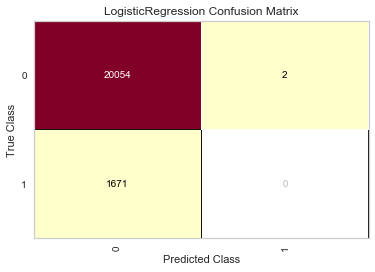

/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adamgoldstein/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9214496782686342

In [20]:
from sklearn.model_selection import cross_val_score,train_test_split
from yellowbrick.classifier import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
logreg.predict(df_test)
#predict_proba

#Cross
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
confusion_matrix(logreg, X_train, y_train, X_test, y_test)
scores = cross_val_score(logreg,X,y)
logreg.score(X,y)


In [ ]:
#SMOT

mode = [Pipeline([
    ('std', StandardScaler()),
    ('reg'),LinearRegression(fit_intercept=False)
    ]),
    Pipeline([
    ('std', StandardScaler()),
    ('reg'),RandomForestRegressor(n_estimator=50)
    ]),
    Pipeline([
    ('std', StandardScaler()),
    ('reg'),MLPRegressor(hidden_layer_sizes=(100,100,100))
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),LinearRegression(fit_intercept=False)
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),RandomForestRegressor(n_estimator=50)
    ]),
    Pipeline([
    ('std', RobustScaler()),
    ('reg'),MLPRegressor(hidden_layer_sizes=(100,100,100))
    ]),
]


#check_is_fitted(model,['support_fit_','support_','support_vectors_'])
model.fit(X,y)
model.score(X,y)